In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## retention 히트맵으로 표현하기

In [2]:
data1 = pd.read_excel("./data1.xlsx", sheet_name="signup", header=0)

data1.head()

,user_id,sign_up,last_login,sign_up_month,last_login_month
0,1,2019-01-01,2019-06-03,2019-01-01,2019-06-01
1,2,2019-01-01,2019-11-02,2019-01-01,2019-11-01
2,3,2019-01-01,2019-01-23,2019-01-01,2019-01-01
3,4,2019-01-01,2019-04-19,2019-01-01,2019-04-01
4,5,2019-01-01,2019-06-25,2019-01-01,2019-06-01


In [3]:
# 연습하면서 저장돼 있던 컬럼 지우기

data1 = data1.drop(labels=["sign_up_month", "last_login_month"], axis=1)

data1.head()

,user_id,sign_up,last_login
0,1,2019-01-01,2019-06-03
1,2,2019-01-01,2019-11-02
2,3,2019-01-01,2019-01-23
3,4,2019-01-01,2019-04-19
4,5,2019-01-01,2019-06-25


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10471 entries, 0 to 10470
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     10471 non-null  int64         
 1   sign_up     10471 non-null  datetime64[ns]
 2   last_login  10471 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 245.5 KB


In [5]:
# 회원 가입한 날짜 연,월만 추출

data1["sign_up_month"] = data1["sign_up"].dt.strftime("%Y-%m")
data1

,user_id,sign_up,last_login,sign_up_month
0,1,2019-01-01,2019-06-03,2019-01
1,2,2019-01-01,2019-11-02,2019-01
2,3,2019-01-01,2019-01-23,2019-01
3,4,2019-01-01,2019-04-19,2019-01
4,5,2019-01-01,2019-06-25,2019-01
...,...,...,...,...
10466,10467,2019-12-31,2019-12-31,2019-12
10467,10468,2019-12-31,2019-12-31,2019-12
10468,10469,2019-12-31,2019-12-31,2019-12
10469,10470,2019-12-31,2019-12-31,2019-12


In [6]:
# 마지막으로 접속한 날짜 연,월만 추출

data1["last_login_month"] = data1["last_login"].dt.strftime("%Y-%m")
data1

,user_id,sign_up,last_login,sign_up_month,last_login_month
0,1,2019-01-01,2019-06-03,2019-01,2019-06
1,2,2019-01-01,2019-11-02,2019-01,2019-11
2,3,2019-01-01,2019-01-23,2019-01,2019-01
3,4,2019-01-01,2019-04-19,2019-01,2019-04
4,5,2019-01-01,2019-06-25,2019-01,2019-06
...,...,...,...,...,...
10466,10467,2019-12-31,2019-12-31,2019-12,2019-12
10467,10468,2019-12-31,2019-12-31,2019-12,2019-12
10468,10469,2019-12-31,2019-12-31,2019-12,2019-12
10469,10470,2019-12-31,2019-12-31,2019-12,2019-12


In [7]:
data1["last_login_month2"] = data1["last_login_month"]

In [8]:
# 가입일 기준, 마지막으로 접속한 유저를 월별로 합계

pivot_table = pd.pivot_table(data=data1, values='last_login_month2', index=["sign_up_month"],
                             columns=['last_login_month'], aggfunc="count")

pivot_table

last_login_month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
sign_up_month,,,,,,,,,,,,
2019-01,109.0,21.0,46.0,28.0,42.0,19.0,24.0,20.0,18.0,22.0,20.0,59.0
2019-02,NaN,94.0,34.0,25.0,37.0,22.0,34.0,34.0,25.0,31.0,34.0,111.0
2019-03,NaN,NaN,86.0,27.0,35.0,37.0,26.0,41.0,42.0,43.0,37.0,171.0
2019-04,NaN,NaN,NaN,84.0,34.0,22.0,36.0,35.0,29.0,43.0,34.0,184.0
2019-05,NaN,NaN,NaN,NaN,74.0,37.0,29.0,27.0,33.0,47.0,45.0,238.0
2019-06,NaN,NaN,NaN,NaN,NaN,84.0,29.0,31.0,29.0,27.0,39.0,291.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,74.0,32.0,26.0,31.0,24.0,308.0
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,37.0,41.0,31.0,348.0
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,44.0,34.0,473.0


In [9]:
# 총 합계 추가(총 합계는 특정 월에 회원가입한 유저 수가 됨)

pivot_table["sum"] = pivot_table.sum(axis=1, min_count=1)

pivot_table

last_login_month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,sum
sign_up_month,,,,,,,,,,,,,
2019-01,109.0,21.0,46.0,28.0,42.0,19.0,24.0,20.0,18.0,22.0,20.0,59.0,428.0
2019-02,NaN,94.0,34.0,25.0,37.0,22.0,34.0,34.0,25.0,31.0,34.0,111.0,481.0
2019-03,NaN,NaN,86.0,27.0,35.0,37.0,26.0,41.0,42.0,43.0,37.0,171.0,545.0
2019-04,NaN,NaN,NaN,84.0,34.0,22.0,36.0,35.0,29.0,43.0,34.0,184.0,501.0
2019-05,NaN,NaN,NaN,NaN,74.0,37.0,29.0,27.0,33.0,47.0,45.0,238.0,530.0
2019-06,NaN,NaN,NaN,NaN,NaN,84.0,29.0,31.0,29.0,27.0,39.0,291.0,530.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,74.0,32.0,26.0,31.0,24.0,308.0,495.0
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,37.0,41.0,31.0,348.0,534.0
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,44.0,34.0,473.0,632.0


In [10]:
# 특정 월에 가입한 유저의 월별 잔존수 확인

pv_retention = pd.DataFrame(index=pivot_table.index, columns=pivot_table.columns[0:12])

for i in range(12) : 
    pv_retention.iloc[i,i] = pivot_table["sum"][i]

    if i != 11 : 
        for k in range(12-(i+1)) : 
            pv_retention.iloc[i,k+i+1] = pv_retention.iloc[i,k+i] - pivot_table.iloc[i,k+i]

pv_retention

last_login_month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
sign_up_month,,,,,,,,,,,,
2019-01,428.0,319.0,298.0,252.0,224.0,182.0,163.0,139.0,119.0,101.0,79.0,59.0
2019-02,NaN,481.0,387.0,353.0,328.0,291.0,269.0,235.0,201.0,176.0,145.0,111.0
2019-03,NaN,NaN,545.0,459.0,432.0,397.0,360.0,334.0,293.0,251.0,208.0,171.0
2019-04,NaN,NaN,NaN,501.0,417.0,383.0,361.0,325.0,290.0,261.0,218.0,184.0
2019-05,NaN,NaN,NaN,NaN,530.0,456.0,419.0,390.0,363.0,330.0,283.0,238.0
2019-06,NaN,NaN,NaN,NaN,NaN,530.0,446.0,417.0,386.0,357.0,330.0,291.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,495.0,421.0,389.0,363.0,332.0,308.0
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0,457.0,420.0,379.0,348.0
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,632.0,551.0,507.0,473.0


In [11]:
# 잔존수를 비율로 표현

pv_rt_ratio = pd.DataFrame(index=pv_retention.index, columns=pv_retention.columns)

for i in range(12) : 
    for k in range(12) : 
        pv_rt_ratio.iloc[i,k] = round(pv_retention.iloc[i,k] / pv_retention.iloc[i,i],3)

pv_rt_ratio

last_login_month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
sign_up_month,,,,,,,,,,,,
2019-01,1.0,0.745,0.696,0.589,0.523,0.425,0.381,0.325,0.278,0.236,0.185,0.138
2019-02,NaN,1.0,0.805,0.734,0.682,0.605,0.559,0.489,0.418,0.366,0.301,0.231
2019-03,NaN,NaN,1.0,0.842,0.793,0.728,0.661,0.613,0.538,0.461,0.382,0.314
2019-04,NaN,NaN,NaN,1.0,0.832,0.764,0.721,0.649,0.579,0.521,0.435,0.367
2019-05,NaN,NaN,NaN,NaN,1.0,0.86,0.791,0.736,0.685,0.623,0.534,0.449
2019-06,NaN,NaN,NaN,NaN,NaN,1.0,0.842,0.787,0.728,0.674,0.623,0.549
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.851,0.786,0.733,0.671,0.622
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.856,0.787,0.71,0.652
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.872,0.802,0.748


In [12]:
# 시각화를 위해 NaN을 0으로 대체

pv_rt_ratio_zero = pv_rt_ratio.fillna(0)

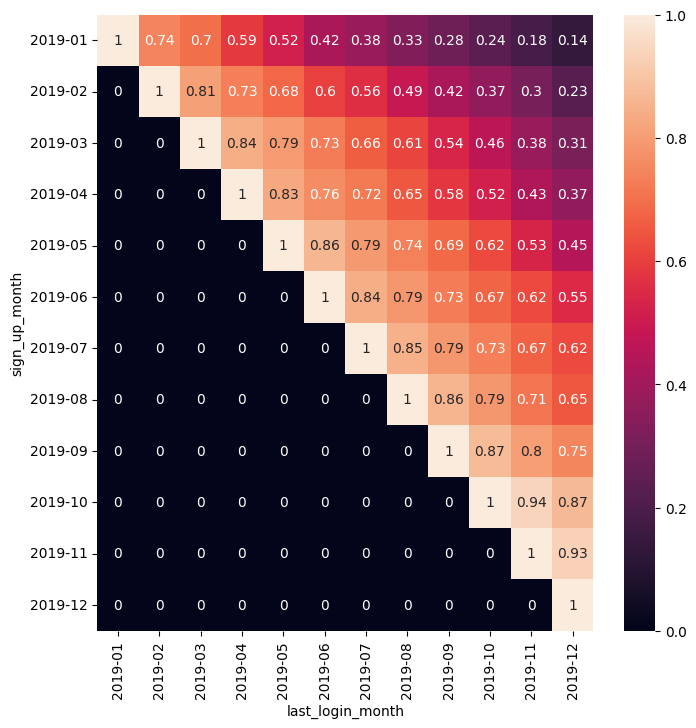

In [13]:
# retention을 heatmap으로 시각화

plt.figure(figsize=(8,8))

sns.heatmap(pv_rt_ratio_zero, annot=True)
plt.show()

## revenue 쪼개기

In [14]:
data2 = pd.read_excel("./data1.xlsx", sheet_name="payment")

data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   payment_id  1654 non-null   int64         
 1   item        1654 non-null   object        
 2   payment     1654 non-null   int64         
 3   buy_date    1654 non-null   datetime64[ns]
 4   user_id     1654 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 64.7+ KB


,payment_id,item,payment,buy_date,user_id
0,1,아이템E,20000,2019-12-01,70
1,2,아이템B,5000,2019-12-01,1153
2,3,아이템A,3000,2019-12-01,1210
3,4,아이템A,3000,2019-12-01,1242
4,5,아이템E,20000,2019-12-01,975


In [15]:
# 유저별 결제 횟수 파악

count_user_id = data2.groupby("user_id")["payment"].count()
count_user_id.head(10)

user_id
12     1
14     1
70     1
72     1
85     1
86     1
113    2
159    2
161    1
168    1
Name: payment, dtype: int64

In [16]:
# 유저별 결제 금액 합계 파악

sum_user_id = data2.groupby("user_id")["payment"].sum()
sum_user_id.head()

user_id
12     3000
14    20000
70    20000
72    20000
85    20000
Name: payment, dtype: int64

In [17]:
# 결제 횟수와 결제 총 금액을 join

sales_per_user = pd.merge(left=count_user_id, right=sum_user_id, how="inner", on="user_id")

sales_per_user.info()

sales_per_user.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1506 entries, 12 to 10468
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   payment_x  1506 non-null   int64
 1   payment_y  1506 non-null   int64
dtypes: int64(2)
memory usage: 35.3 KB


,payment_x,payment_y
user_id,,
12,1,3000
14,1,20000
70,1,20000
72,1,20000
85,1,20000


In [18]:
# 해당 유저의 가입연월을 join

sales_per_user = pd.merge(left=sales_per_user, right=data1[["user_id", "sign_up_month"]], how="inner", on="user_id")

sales_per_user.head()

,user_id,payment_x,payment_y,sign_up_month
0,12,1,3000,2019-01
1,14,1,20000,2019-01
2,70,1,20000,2019-01
3,72,1,20000,2019-01
4,85,1,20000,2019-01


In [19]:
# 컬럼명을 excel 파일과 동일하게 변경

sales_per_user.columns = ["user_id", "payment_count", "sales", "signup_mon"]

sales_per_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        1506 non-null   int64 
 1   payment_count  1506 non-null   int64 
 2   sales          1506 non-null   int64 
 3   signup_mon     1506 non-null   object
dtypes: int64(3), object(1)
memory usage: 47.2+ KB


In [20]:
# 결제 유저 중 특정 월에 가입한 사람 수 파악

num_pay_join_mon = sales_per_user.groupby("signup_mon")["user_id"].count()
num_pay_join_mon

signup_mon
2019-01     25
2019-02     39
2019-03     57
2019-04     49
2019-05     58
2019-06     65
2019-07     70
2019-08     72
2019-09     99
2019-10    128
2019-11    361
2019-12    483
Name: user_id, dtype: int64

In [21]:
# 특정 월에 가입한 사람들의 매출 합계

sum_pay_join_mon = sales_per_user.groupby("signup_mon")["sales"].sum()
sum_pay_join_mon

signup_mon
2019-01     221000
2019-02     301000
2019-03     496000
2019-04     495000
2019-05     542000
2019-06     597000
2019-07     643000
2019-08     634000
2019-09    1175000
2019-10    1299000
2019-11    3528000
2019-12    4105000
Name: sales, dtype: int64

In [22]:
# 특정 월별 유저 가입 수와 19년도 12월의 잔존 유저 수 join

devide_revenue = pd.concat([num_pay_join_mon, pivot_table[pivot_table.columns[-1]], pv_retention[pv_retention.columns[-1]]], axis=1)

devide_revenue

,user_id,sum,2019-12
2019-01,25,428.0,59.0
2019-02,39,481.0,111.0
2019-03,57,545.0,171.0
2019-04,49,501.0,184.0
2019-05,58,530.0,238.0
2019-06,65,530.0,291.0
2019-07,70,495.0,308.0
2019-08,72,534.0,348.0
2019-09,99,632.0,473.0
2019-10,128,737.0,642.0


In [23]:
# 컬럼 순서와 이름을 변경

devide_revenue = devide_revenue[['sum', '2019-12', 'user_id']]

devide_revenue.columns = ["가입자", "활동회원", "결제자수"]

devide_revenue

,가입자,활동회원,결제자수
2019-01,428.0,59.0,25
2019-02,481.0,111.0,39
2019-03,545.0,171.0,57
2019-04,501.0,184.0,49
2019-05,530.0,238.0,58
2019-06,530.0,291.0,65
2019-07,495.0,308.0,70
2019-08,534.0,348.0,72
2019-09,632.0,473.0,99
2019-10,737.0,642.0,128


In [24]:
# 잔존율과 결제비율 계산한 후 컬럼 추가

devide_revenue["잔존율"] = (devide_revenue["활동회원"] / devide_revenue["가입자"])

devide_revenue["결제비율"] = (devide_revenue["결제자수"] / devide_revenue["활동회원"])

devide_revenue

,가입자,활동회원,결제자수,잔존율,결제비율
2019-01,428.0,59.0,25,0.13785,0.423729
2019-02,481.0,111.0,39,0.230769,0.351351
2019-03,545.0,171.0,57,0.313761,0.333333
2019-04,501.0,184.0,49,0.367265,0.266304
2019-05,530.0,238.0,58,0.449057,0.243697
2019-06,530.0,291.0,65,0.549057,0.223368
2019-07,495.0,308.0,70,0.622222,0.227273
2019-08,534.0,348.0,72,0.651685,0.206897
2019-09,632.0,473.0,99,0.748418,0.209302
2019-10,737.0,642.0,128,0.871099,0.199377


In [25]:
# 매출 컬럼 추가
devide_revenue["매출"] = sum_pay_join_mon

# 순서 변경
devide_revenue = devide_revenue[['가입자','잔존율','활동회원','결제비율','결제자수','매출']]

# ARPPU 계산 후 컬럼 삽입
devide_revenue.insert(5, "ARPPU", (devide_revenue["매출"] / devide_revenue["결제자수"]))

devide_revenue

,가입자,잔존율,활동회원,결제비율,결제자수,ARPPU,매출
2019-01,428.0,0.13785,59.0,0.423729,25,8840.000000,221000
2019-02,481.0,0.230769,111.0,0.351351,39,7717.948718,301000
2019-03,545.0,0.313761,171.0,0.333333,57,8701.754386,496000
2019-04,501.0,0.367265,184.0,0.266304,49,10102.040816,495000
2019-05,530.0,0.449057,238.0,0.243697,58,9344.827586,542000
2019-06,530.0,0.549057,291.0,0.223368,65,9184.615385,597000
2019-07,495.0,0.622222,308.0,0.227273,70,9185.714286,643000
2019-08,534.0,0.651685,348.0,0.206897,72,8805.555556,634000
2019-09,632.0,0.748418,473.0,0.209302,99,11868.686869,1175000
2019-10,737.0,0.871099,642.0,0.199377,128,10148.437500,1299000


In [26]:
# 확인용 데이터 프레임 따로 생성, 비율을 %로 표시(원본은 1이하의 수)

display_devide_revenue = devide_revenue.style.format({"잔존율": '{:.1%}', "결제비율": '{:.1%}'})

display_devide_revenue

,가입자,잔존율,활동회원,결제비율,결제자수,ARPPU,매출
2019-01,428.000000,13.8%,59.000000,42.4%,25,8840.000000,221000
2019-02,481.000000,23.1%,111.000000,35.1%,39,7717.948718,301000
2019-03,545.000000,31.4%,171.000000,33.3%,57,8701.754386,496000
2019-04,501.000000,36.7%,184.000000,26.6%,49,10102.040816,495000
2019-05,530.000000,44.9%,238.000000,24.4%,58,9344.827586,542000
2019-06,530.000000,54.9%,291.000000,22.3%,65,9184.615385,597000
2019-07,495.000000,62.2%,308.000000,22.7%,70,9185.714286,643000
2019-08,534.000000,65.2%,348.000000,20.7%,72,8805.555556,634000
2019-09,632.000000,74.8%,473.000000,20.9%,99,11868.686869,1175000
2019-10,737.000000,87.1%,642.000000,19.9%,128,10148.437500,1299000


### 잔존율, 결제비율, ARPPU 시각화

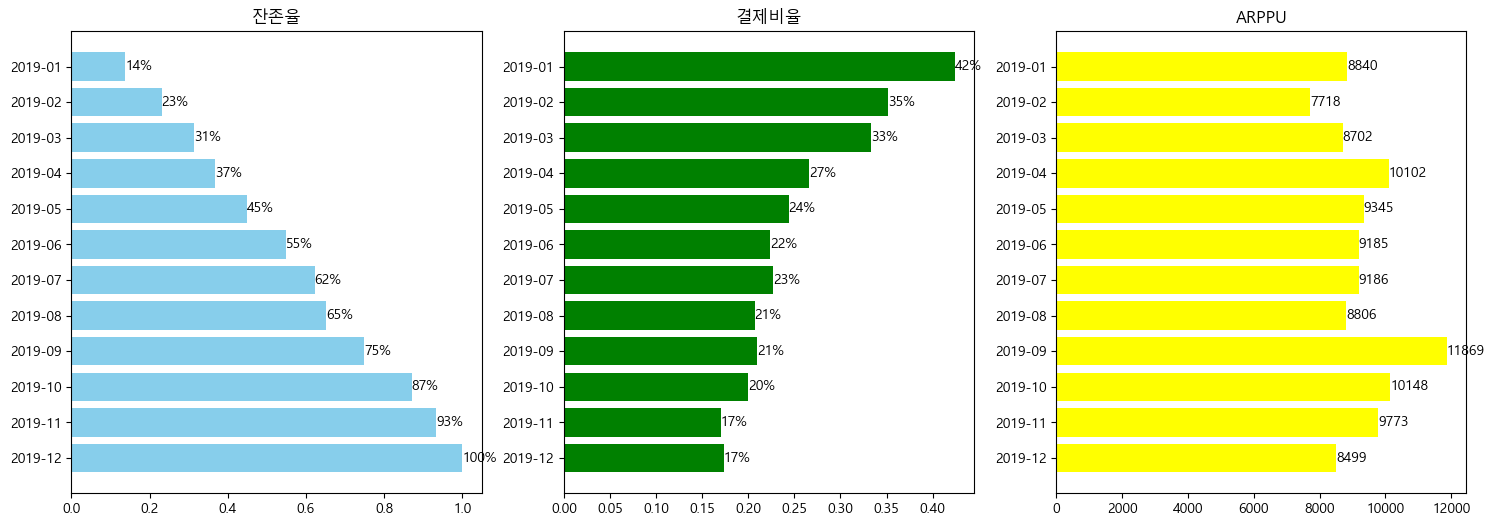

In [32]:
plt.rcParams["font.family"] = "Malgun Gothic"

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=3)

colorList = ["skyblue", "green", "yellow"]

cnt = 0

for i in range(3) : 

    # 세로로 보는 bar chart 생성
    axs[i].barh(y=devide_revenue.index, width=devide_revenue.iloc[:,i*2+1], color=colorList[i], align="center")

    # bar 하나의 값을 표시
    for k, v in enumerate(devide_revenue.iloc[:,i*2+1]) : 

        # 마지막 컬럼은 반올림해서 표시
        if cnt == 2 : 
            axs[i].text(v, devide_revenue.index[k], round(v), 
                        horizontalalignment='left', # horizontalalignment (left, center, right)
                        verticalalignment='center') # verticalalignment (top, center, bottom)
        # 이외의 컬럼은 %로 표시    
        else : 
            axs[i].text(v, devide_revenue.index[k], str(round(v*100))+"%", 
                        horizontalalignment='left', # horizontalalignment (left, center, right)
                        verticalalignment='center') # verticalalignment (top, center, bottom)

    axs[i].set_title(devide_revenue.columns[i*2+1])
    
    # y축 스케일 반전
    axs[i].invert_yaxis()

    cnt += 1
plt.show()

### 현재 revenue 데이터 프레임 저장

In [34]:
devide_revenue.to_csv("./practice_revenue.csv")